1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

<ipython-input-37-4b7717aa6191>:28: RuntimeWarning: divide by zero encountered in log2
  return -np.log2(1-p)/mu


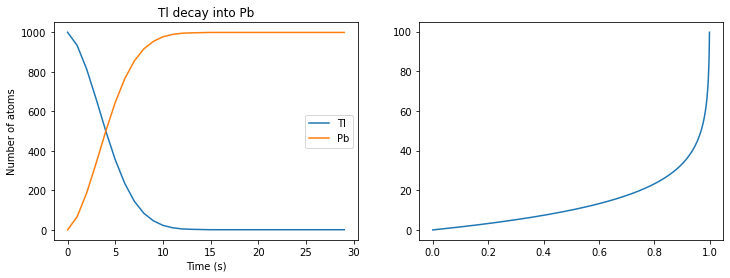

In [37]:
import numpy as np
import matplotlib.pyplot as plt
def expon_cdf(x, mu=0.1):   #In the statement doesent say how much is mu
    """CDF of exponetial distribution."""
    return 1 - 2.**(-mu*x)

time = np.arange(0,30)
tl = 1000

tlCount = []
pbCount =[]
for t in time:
    tl = tl - int(tl*expon_cdf(t))
    tlCount.append(tl)
    pbCount.append(1000-tl)
    
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(time, tlCount, label = 'Tl')
plt.plot(time, pbCount, label = 'Pb')
plt.legend()
plt.title('Tl decay into Pb')
plt.ylabel('Number of atoms')
plt.xlabel('Time (s)')

def expon_icdf(p, mu=0.1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log2(1-p)/mu
plt.subplot(122)
x = np.linspace(0,1,1000)

plt.plot(x, expon_icdf(x))


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [46]:
a0= 174*10**-12
b = np.random.normal(0, a0/100, 1000)
E0= 8.8541878176* 10**-12
E = 7.7*10**6
Z = 79
tita = 2* np.arctan((Z*np.exp(2))/(2*np.pi * E0*E*b))

count = (tita > (np.pi/2)).sum()
print('The amount particles that bounce back are: ', count)



The amount particles that bounce back are:  506


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [98]:
import scipy.integrate as integrate
def f(x):
    return (np.sin(1/(x*(2-x))))**2

# Monte Carlo integration
N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
result, __ = integrate.quad(f, 0.001, 1.999)
print('Monte carlo integration: ',I)
print('Real value: ', result)
error = (I-result)/result * 100
print('Error with Monte carlo: ', error, '%')

# mean value method
fsum= 0

x = np.random.uniform(0, 2, N)
for i in range(len(x)):
    fsum += f(x[i])
Imean = (1.999-0.001)/N *fsum
print('Mean value integration: ',Imean)
meanError = (Imean-result)/result *100
print('Error with mean value: ', meanError, '%')

<ipython-input-98-f2ed7029b915>:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, __ = integrate.quad(f, 0.001, 1.999)


Monte carlo integration:  1.4511
Real value:  1.4503140803330734
Error with Monte carlo:  0.05418961848223646 %
Mean value integration:  1.4489502379373291
Error with mean value:  -0.09403772701641702 %


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [96]:
def f(x,y):
    if x**2 + y**2 <= 1:
        return 1
    else: 
        return 0
# Monte Carlo integration
N=1000000
count=0
for i in range(N):
    x=np.random.random()
    y=np.random.random()
    z = np.random.random()
    if z<f(x,y): count+=1
I=count/N
print('Two dimensions iteration: ',I)
print('Two dimensions integration verification: ', integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1))

def f(x):
    f =0
    for i in range(len(x)):
        f += x[i]**2
    if f>=1: return 0
    else: return 1
x=np.ones((10,1))
for i in range(N):
    for j in range(10):
        x[j]= np.random.random()
    y = np.random.random()
    if y<f(x):count +=1
I = count /N
print('Ten dimensions integration: ',I)
    
    

Two dimensions iteration:  0.785784
Two dimensions integration verification:  (0.7893255354070009, 1.481797173255934e-08)
Ten dimensions integration:  0.788316


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [110]:
N = 1000000
def f(x):
    return (x**-0.5)/(np.exp(x)+1)
def w(x):
    return 1/x**0.5
 
x = np.random.uniform(0,1, N)

s= 0
for i in range(N):
    s += f(x[i])/w(x[i])
    
I = s /N * integrate.quad(w, 0, 1)[0]
print(I)

0.759913546254013
